In [1]:
import numpy as np
from scipy.integrate import odeint
import math
import matplotlib.pyplot as plt
from sympy import * 
#from spring_damp import force_time, mass_damp_spring, ideal_actual, graphs
from spring_damp import graphs
import random
random.seed(49) 
#spring and damp error is 10% of the lowest range
#increment = 0.01
# no:- of masses is k then, no of spring and damp are multiples of K (5k, 10k etc:-)

k = graphs(time = 90, increment = 0.01, state= [0,0], force = sin, amplitude=1, omega=0.1,
            no_mass = 10, range_mass=[1,20], no_spring= 50, range_spring = [5.0, 30.1], 
            no_damp = 50, range_damp=[5.0, 30.1], uniform=1, delta_mass = 0, delta_spring=1, 
            delta_damp = 1)


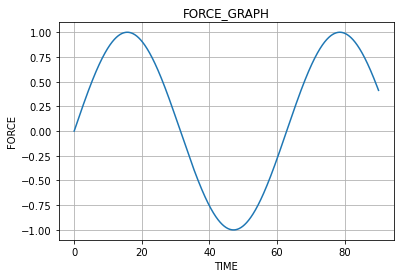

In [2]:
k.force_graph()

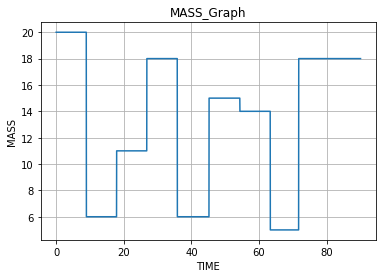

In [3]:
k.mass_graph()

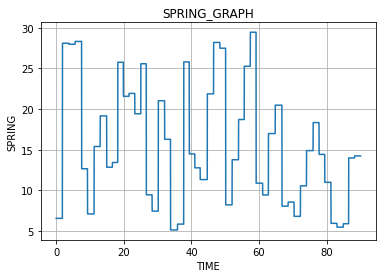

In [4]:
k.spring_graph()

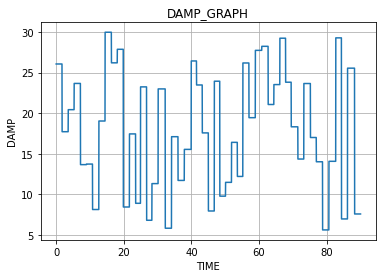

In [5]:
k.damp_graph()

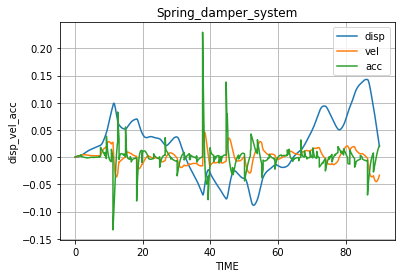

In [6]:
k.ideal_graph()

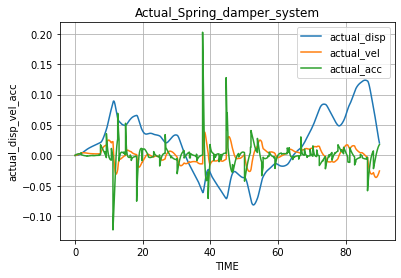

In [7]:
k.actual_graph()

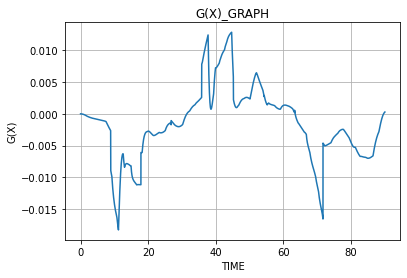

In [8]:
k.g_x()

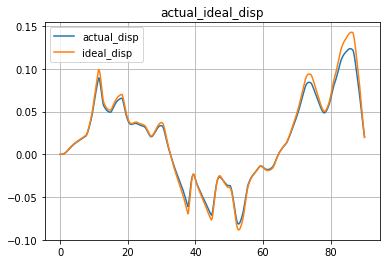

In [9]:
k.compare_disp()

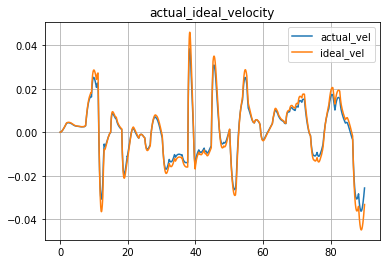

In [10]:
k.compare_vel()

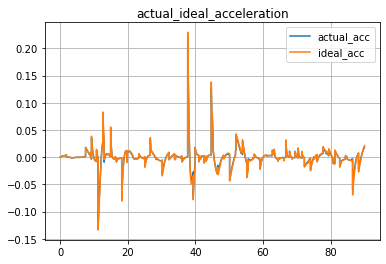

In [11]:
k.compare_acc()

In [20]:
df = k.actual_values_csv()
df.to_csv('sim_1.csv', index=False)

In [21]:
df

,time_step,Amplitude,Angular_Vel,force,mass,K,B,delta_mass,delta_K,delta_B,ideal_disp,ideal_vel,ideal_acc,actual_disp,actual_vel,actual_acc,G(x)
0,0.00,1,0.1,0.000000,20,6.551136,26.052981,0,1,1,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,-0.000000e+00
1,0.01,1,0.1,0.001000,20,6.551136,26.052981,0,1,1,1.684966e-13,1.374433e-09,0.000050,1.495658e-13,1.219789e-09,0.000050,-6.099692e-11
2,0.02,1,0.1,0.002000,20,6.551136,26.052981,0,1,1,2.541462e-09,5.213972e-07,0.000099,2.539368e-09,5.208781e-07,0.000099,-2.617087e-08
3,0.03,1,0.1,0.003000,20,6.551136,26.052981,0,1,1,1.324522e-08,1.510869e-06,0.000148,1.323553e-08,1.509724e-06,0.000148,-7.614796e-08
4,0.04,1,0.1,0.004000,20,6.551136,26.052981,0,1,1,3.628183e-08,3.001306e-06,0.000196,3.620790e-08,2.958912e-06,0.000196,-1.497560e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8996,89.96,1,0.1,0.415760,18,14.235413,7.598909,0,1,1,2.113747e-02,-3.406562e-02,0.020762,2.148086e-02,-2.633276e-02,0.017496,2.695498e-04
8997,89.97,1,0.1,0.414850,18,14.235413,7.598909,0,1,1,2.079786e-02,-3.385709e-02,0.020892,2.121841e-02,-2.615714e-02,0.017583,2.743741e-04
8998,89.98,1,0.1,0.413940,18,14.235413,7.598909,0,1,1,2.046033e-02,-3.364733e-02,0.021020,2.095772e-02,-2.598070e-02,0.017669,2.790544e-04
8999,89.99,1,0.1,0.413029,18,14.235413,7.598909,0,1,1,2.012491e-02,-3.343625e-02,0.021146,2.069880e-02,-2.580333e-02,0.017753,2.835853e-04


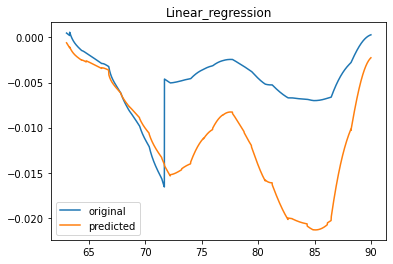

In [61]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim 
torch.manual_seed(10)

import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings("ignore") 
import time 
import random 
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import make_pipeline 
import matplotlib.pyplot as plt

#from spring_damp import spring_damp_mass

ss = StandardScaler()
lr = LinearRegression()
rfr = RandomForestRegressor(max_depth = 5, n_estimators=100,random_state = 0 )
etr = ExtraTreesRegressor(max_depth = 5, n_estimators = 100, random_state = 0)
gbr = GradientBoostingRegressor(random_state = 0)

df = pd.read_csv('sim_1.csv') 

imp_colums = ["time_step", "force", "mass", "K", "B","actual_disp", "actual_vel", "actual_acc", "G(x)"] 

for i in df.columns:
    if i not in imp_colums:
        df = df.drop([i], axis=1)

X_train = df.iloc[:6302, :8]
y_train = df.iloc[:6302, 8:]
X_test = df.iloc[6302:, :8]
y_test = df.iloc[6302:, 8:]

def compare(z1, title): 
    plt.plot(X_test['time_step'], y_test['G(x)'])
    plt.plot(X_test['time_step'], z1)
    plt.legend(['original', 'predicted'])
    plt.title(title)

lr.fit(X_train, y_train)
z1 = lr.predict(X_test) 
compare(z1, "Linear_regression")

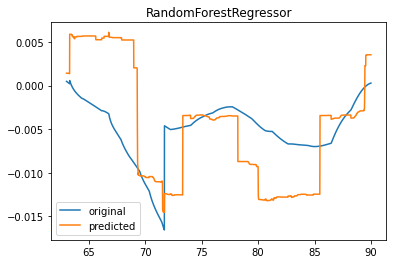

In [62]:
rfr.fit(X_train, y_train)
z1 = rfr.predict(X_test) 
compare(z1, "RandomForestRegressor")

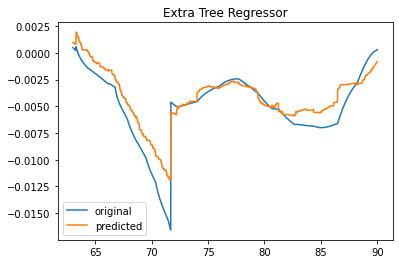

In [63]:
etr.fit(X_train, y_train)
z1 = etr.predict(X_test) 
compare(z1, "Extra Tree Regressor")

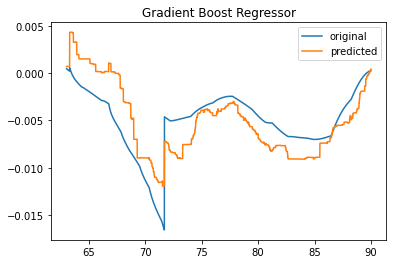

In [64]:
gbr.fit(X_train, y_train)
z1 = gbr.predict(X_test) 
compare(z1, "Gradient Boost Regressor")

In [65]:
import sklearn.gaussian_process as gp
kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))

model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)

model.fit(X_train, y_train)
params = model.kernel_.get_params()



KeyboardInterrupt: 

In [ ]:
y_pred, std = model.predict(X_test, return_std=True)